# Fraud Detection Data Preprosessing

## 1. Import libraries and loading dataset

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
pd.set_option('display.max_columns', 50)

In [58]:
pd.read_csv('~/aiffel/data/fraud.csv')
# https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset?select=fraudTrain.csv

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


## 2. Understanding dataset

In [59]:
fraud_df = pd.read_csv('~/aiffel/data/fraud.csv')
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [60]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

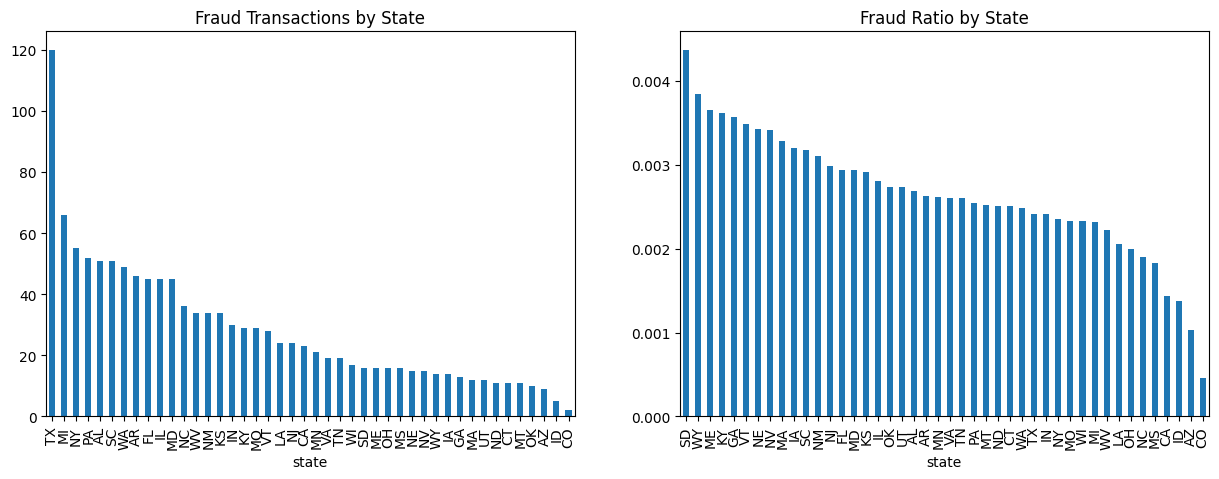

In [61]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

fraud_df.groupby('state')['is_fraud'].sum().sort_values(ascending=False).plot.bar(ax = ax[0])
ax[0].set_title('Fraud Transactions by State')

fraud_df.groupby('state')['is_fraud'].mean().sort_values(ascending=False).plot.bar(ax = ax[1])
ax[1].set_title('Fraud Ratio by State')

plt.show()


Text(0.5, 1.0, 'Fraud Ratio by Category')

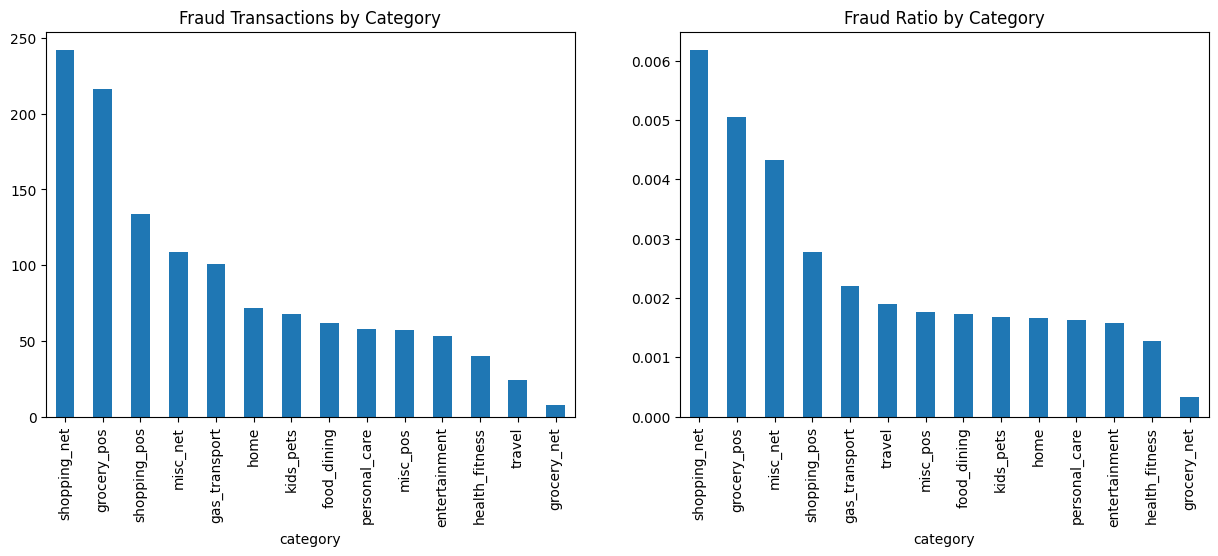

In [62]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))

fraud_df.groupby('category')['is_fraud'].sum().sort_values(ascending=False).plot.bar(ax = ax[0])
ax[0].set_title('Fraud Transactions by Category')

fraud_df.groupby('category')['is_fraud'].mean().sort_values(ascending=False).plot.bar(ax = ax[1])
ax[1].set_title('Fraud Ratio by Category')

Text(0.5, 1.0, 'Fraud Ratio by Category')

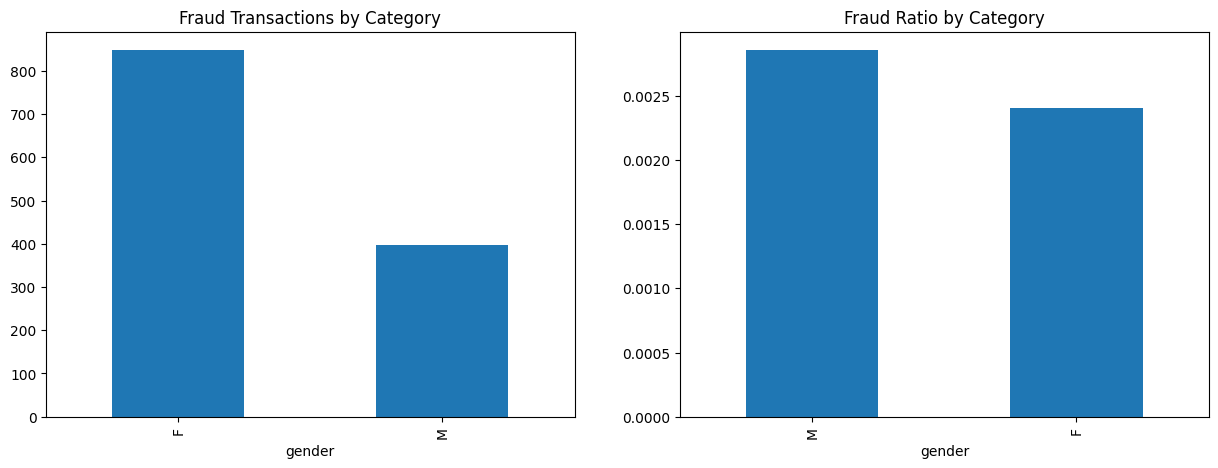

In [63]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))

# sns.countplot(data = fraud_df, x = 'gender', hue = 'is_fraud', ax = ax[0])
fraud_df.groupby('gender')['is_fraud'].sum().sort_values(ascending=False).plot.bar(ax = ax[0])
ax[0].set_title('Fraud Transactions by Category')

fraud_df.groupby('gender')['is_fraud'].mean().sort_values(ascending=False).plot.bar(ax = ax[1])
ax[1].set_title('Fraud Ratio by Category')

## 3. Handling duplicated data

In [64]:
fraud_df[fraud_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


## 4. Handling missing data

In [65]:
fraud_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [66]:
fraud_df.isna().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

## 5. Change data type 'trans_date_trans_time' & 'dob' to  datetime

In [67]:
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])

In [68]:
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'])

In [69]:
fraud_df[['trans_date_trans_time', 'dob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 2 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  491134 non-null  datetime64[ns]
 1   dob                    491134 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 7.5 MB


## 6. Extract 'hour' & 'weekday' value from the 'trans_date_trans_time', and extract 'age' from 'dob'

In [70]:
fraud_df['weekday'] = fraud_df['trans_date_trans_time'].dt.weekday


In [71]:
fraud_df['hour'] = fraud_df['trans_date_trans_time'].dt.hour

In [72]:
from datetime import datetime

today = datetime.now()
fraud_df['age'] = today.year - fraud_df['dob'].dt.year

In [73]:
fraud_df[['hour', 'weekday', 'age']].describe()

,hour,weekday,age
count,491134.000000,491134.000000,491134.000000
mean,14.123087,2.980873,39.615769
std,6.406759,2.209188,9.297579
min,0.000000,0.000000,20.000000
25%,10.000000,1.000000,32.000000
50%,15.000000,3.000000,40.000000
75%,19.000000,5.000000,48.000000
max,23.000000,6.000000,54.000000


Text(0.5, 1.0, 'Age Distribution')

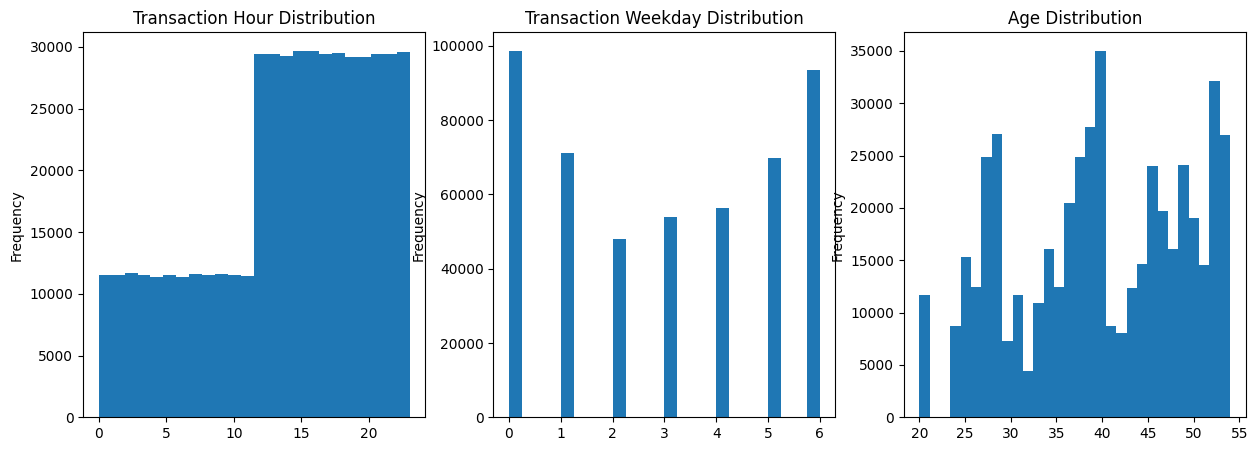

In [74]:
f, ax = plt.subplots(1, 3, figsize = (15, 5))

fraud_df['hour'].plot.hist(ax = ax[0], bins = 24)
ax[0].set_title('Transaction Hour Distribution')

fraud_df['weekday'].plot.hist(ax = ax[1], bins = 24)
ax[1].set_title('Transaction Weekday Distribution')

fraud_df['age'].plot.hist(ax = ax[2], bins = 30)
ax[2].set_title('Age Distribution')

## 7. Binning 'amt' data 

<Axes: xlabel='None', ylabel='amt'>

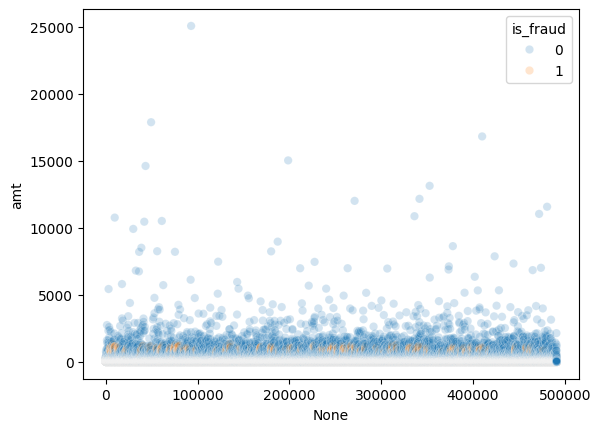

In [75]:
sns.scatterplot(data = fraud_df, x = fraud_df.index, y = 'amt', hue = 'is_fraud', alpha = 0.2)

<Axes: xlabel='None', ylabel='amt'>

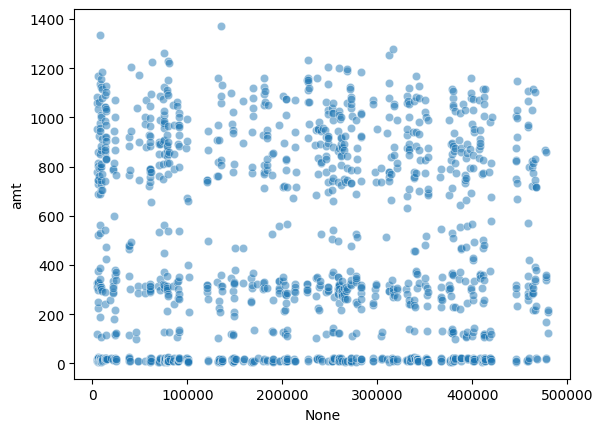

In [76]:
fraud_only_df = fraud_df[fraud_df['is_fraud'] == 1]
sns.scatterplot(data = fraud_only_df, x = fraud_only_df.index, y = 'amt', alpha = 0.5)

In [77]:
fraud_df['amt'].describe()

count    491134.000000
mean         69.050120
std         160.322867
min           1.000000
25%           8.960000
50%          42.170000
75%          80.330000
max       25086.940000
Name: amt, dtype: float64

In [78]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 25000]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
fraud_df['amt_bin'] = pd.cut(fraud_df['amt'], bins = bins, labels = labels)

<Axes: xlabel='None', ylabel='amt_bin'>

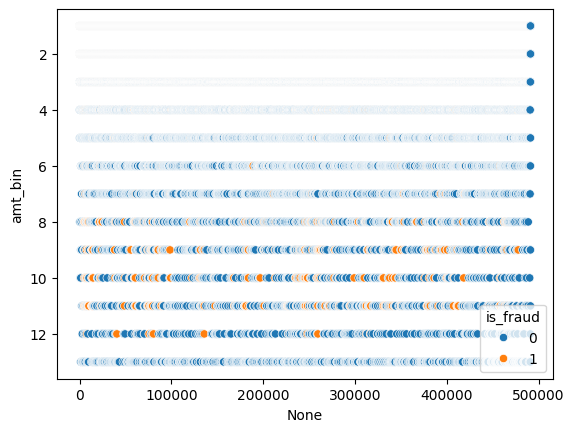

In [79]:
sns.scatterplot(data=fraud_df, x = fraud_df.index, y= 'amt_bin', hue='is_fraud')

/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_32326/14337534.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_df.groupby('amt_bin')['is_fraud'].mean().plot.bar()


<Axes: xlabel='amt_bin'>

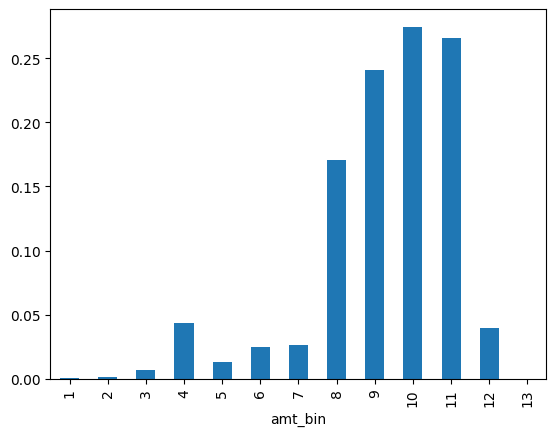

In [80]:
fraud_df.groupby('amt_bin')['is_fraud'].mean().plot.bar()

## 8. Divide region w/c/e depend on the 'long' column 


<Axes: xlabel='long', ylabel='lat'>

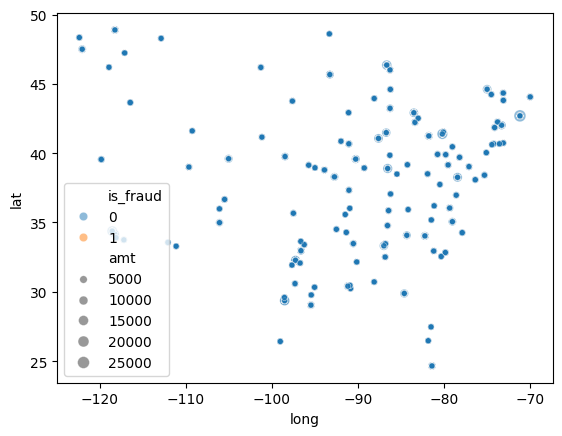

In [81]:
sns.scatterplot(data=fraud_df, x = 'long', y= 'lat', hue='is_fraud', size = 'amt', alpha = 0.5)

<Axes: xlabel='long', ylabel='lat'>

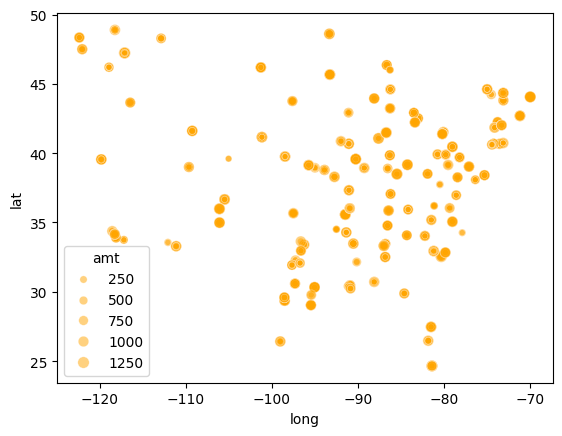

In [82]:
fraud_only_df = fraud_df[fraud_df['is_fraud'] == 1]
sns.scatterplot(data = fraud_only_df, x = 'long', y = 'lat', size = 'amt', alpha = 0.5, color = 'orange')

In [83]:
def determine_region_ew(longitude):
    if -82 <= longitude <= -66:
        return 'Eastern'
    elif -101 <= longitude < -82:
        return 'Central'
    elif -125 <= longitude < -101:
        return 'Western'
    else:
        return 'Other'
    
fraud_df['east_west'] = fraud_df['long'].apply(determine_region_ew).astype('category')


<Axes: xlabel='long', ylabel='lat'>

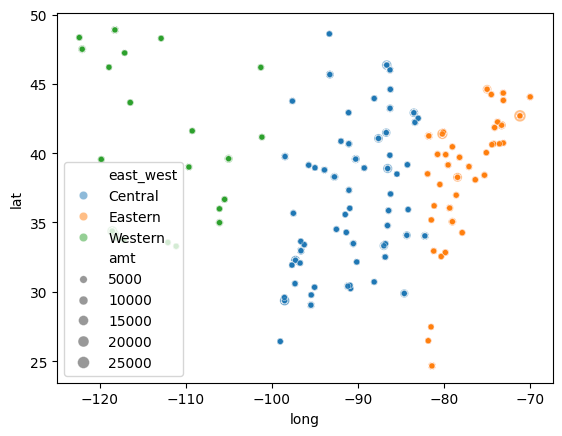

In [84]:
sns.scatterplot(data=fraud_df, x = 'long', y= 'lat', hue='east_west', size = 'amt', alpha = 0.5)

In [85]:
fraud_df['east_west'].value_counts()

east_west
Central    245172
Eastern    156957
Western     89005
Name: count, dtype: int64

/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_32326/3342834184.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_df.groupby('east_west')['is_fraud'].sum().plot.bar(ax = ax[0])
/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_32326/3342834184.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_df.groupby('east_west')['is_fraud'].mean().plot.bar(ax = ax[1])


Text(0.5, 1.0, 'Fraud Ratio by East-West Region')

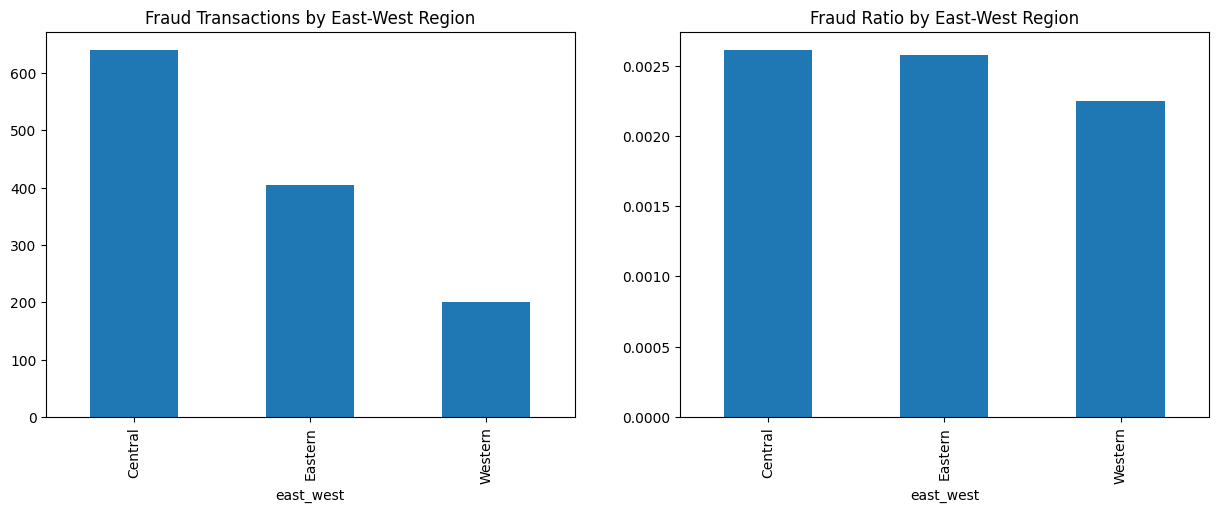

In [86]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))

fraud_df.groupby('east_west')['is_fraud'].sum().plot.bar(ax = ax[0])
ax[0].set_title('Fraud Transactions by East-West Region')

fraud_df.groupby('east_west')['is_fraud'].mean().plot.bar(ax = ax[1])
ax[1].set_title('Fraud Ratio by East-West Region')


## 9. Divide region n/c/s depend on the 'lat' column

In [87]:
def determine_region_ns(latitude):
    if 60 > latitude > 40:
        return 'Northern'
    elif 40 >= latitude > 35:
        return 'Central'
    elif 35 >= latitude > 20:
        return 'Southern'
    else:
        return 'Other'
    
fraud_df['north_south'] = fraud_df['lat'].apply(determine_region_ns).astype('category')

<Axes: xlabel='long', ylabel='lat'>

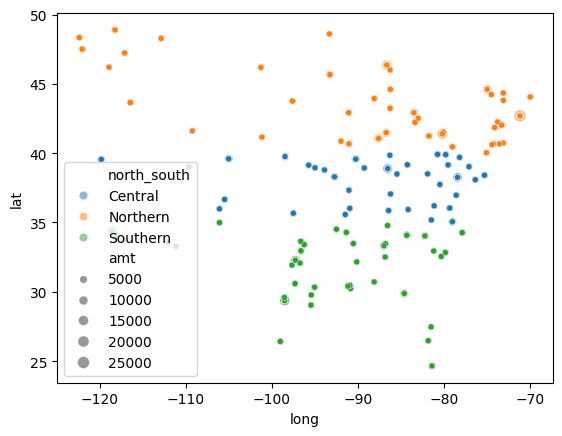

In [88]:
sns.scatterplot(data=fraud_df, x = 'long', y= 'lat', hue='north_south', size = 'amt', alpha = 0.5)

In [89]:
fraud_df['north_south'].value_counts()

north_south
Northern    177374
Southern    165595
Central     148165
Name: count, dtype: int64

/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_32326/2479975318.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_df.groupby('north_south')['is_fraud'].sum().plot.bar(ax = ax[0])
/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_32326/2479975318.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_df.groupby('north_south')['is_fraud'].mean().plot.bar(ax = ax[1])


Text(0.5, 1.0, 'Fraud Ratio by East-West Region')

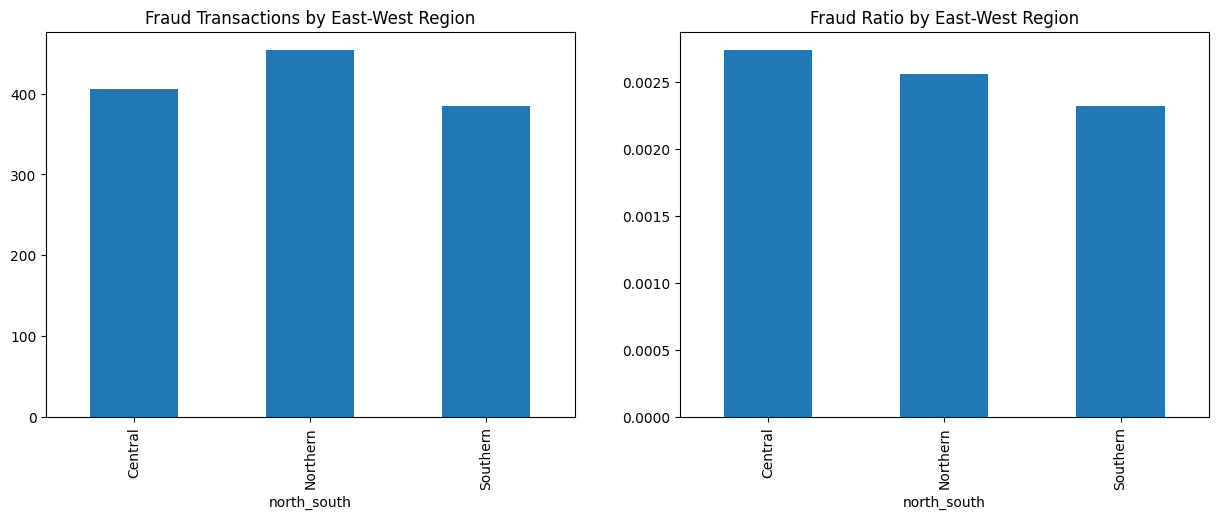

In [90]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))

fraud_df.groupby('north_south')['is_fraud'].sum().plot.bar(ax = ax[0])
ax[0].set_title('Fraud Transactions by East-West Region')

fraud_df.groupby('north_south')['is_fraud'].mean().plot.bar(ax = ax[1])
ax[1].set_title('Fraud Ratio by East-West Region')

## 10. Eliminate unnecessary columns

In [91]:
fraud_df2 = fraud_df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last', 'city', 'street', 'state', 'zip', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'lat', 'long', 'merch_lat', 'merch_long'], axis = 1)

In [92]:
fraud_df2.columns

Index(['category', 'gender', 'is_fraud', 'weekday', 'hour', 'age', 'amt_bin',
       'east_west', 'north_south'],
      dtype='object')

In [93]:
fraud_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   category     491134 non-null  object  
 1   gender       491134 non-null  object  
 2   is_fraud     491134 non-null  int64   
 3   weekday      491134 non-null  int32   
 4   hour         491134 non-null  int32   
 5   age          491134 non-null  int32   
 6   amt_bin      491133 non-null  category
 7   east_west    491134 non-null  category
 8   north_south  491134 non-null  category
dtypes: category(3), int32(3), int64(1), object(2)
memory usage: 18.3+ MB


In [94]:
fraud_df2.head()

,category,gender,is_fraud,weekday,hour,age,amt_bin,east_west,north_south
0,grocery_pos,F,0,1,0,46,2,Western,Northern
1,grocery_pos,M,0,1,0,44,1,Eastern,Northern
2,grocery_net,F,0,1,0,50,1,Eastern,Northern
3,grocery_pos,M,0,1,0,53,1,Central,Northern
4,misc_pos,F,0,1,0,47,1,Central,Southern


## 11. Change datatype object to category for 'category' and 'gender' column

In [95]:
fraud_df2['category'] = fraud_df2['category'].astype('category')

In [96]:
fraud_df2['gender'] = fraud_df2['gender'].astype('category')

In [97]:
fraud_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   category     491134 non-null  category
 1   gender       491134 non-null  category
 2   is_fraud     491134 non-null  int64   
 3   weekday      491134 non-null  int32   
 4   hour         491134 non-null  int32   
 5   age          491134 non-null  int32   
 6   amt_bin      491133 non-null  category
 7   east_west    491134 non-null  category
 8   north_south  491134 non-null  category
dtypes: category(5), int32(3), int64(1)
memory usage: 11.7 MB


## 12. One-Hot encoding & Correlation analysis

In [98]:
fraud_df2_encoded = pd.get_dummies(fraud_df2)
fraud_df2_encoded.corr()

,is_fraud,weekday,hour,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,amt_bin_1,amt_bin_2,amt_bin_3,amt_bin_4,amt_bin_5,amt_bin_6,amt_bin_7,amt_bin_8,amt_bin_9,amt_bin_10,amt_bin_11,amt_bin_12,amt_bin_13,east_west_Central,east_west_Eastern,east_west_Western,north_south_Central,north_south_Northern,north_south_Southern
is_fraud,1.000000,-0.001562,-0.020113,-0.004231,-0.005158,-0.004529,-0.002167,-0.010054,0.015494,-0.006551,-0.005395,-0.005028,0.008306,-0.004094,-0.004997,0.021344,0.001570,-0.002040,-0.004024,0.004024,-0.072414,-0.010982,0.017456,0.070746,0.013069,0.021300,0.019161,0.122379,0.151126,0.145937,0.176425,0.018393,-0.001963,0.001539,0.000560,-0.002675,0.002710,0.000399,-0.003037
weekday,-0.001562,1.000000,0.000054,-0.014351,0.000832,-0.000869,0.001747,-0.000325,-0.001046,-0.000422,-0.001345,-0.000740,0.000450,0.005345,-0.001451,-0.000638,-0.001167,0.000195,-0.004498,0.004498,-0.001515,0.000547,0.000374,0.001586,0.001838,-0.000895,0.001588,-0.001526,0.001955,-0.000963,0.000730,0.003566,-0.000753,0.002793,0.000528,-0.004265,-0.001458,0.000907,0.000494
hour,-0.020113,0.000054,1.000000,-0.050627,0.142345,0.146952,-0.432770,-0.308063,-0.392184,0.137790,0.164066,0.156823,-0.165836,-0.008393,0.148008,0.152760,0.173476,0.084870,-0.015438,0.015438,0.059859,-0.031772,-0.088040,0.009989,0.009908,0.007252,0.012240,0.001925,0.002134,0.005142,0.010155,0.009579,0.018823,0.011227,-0.006171,-0.007103,-0.000303,0.002378,-0.002121
age,-0.004231,-0.014351,-0.050627,1.000000,-0.027086,-0.022047,-0.046536,0.000799,0.053279,-0.015142,0.048195,0.014348,-0.017461,-0.006095,0.003463,0.003302,0.009496,-0.013913,0.167083,-0.167083,-0.030860,0.007378,0.036128,0.007946,0.009172,0.009092,0.008398,0.005145,0.006051,0.003926,0.001451,0.001829,0.002482,-0.114820,0.008620,0.138602,-0.066764,-0.008361,0.073317
category_entertainment,-0.005158,0.000832,0.142345,-0.027086,1.000000,-0.076215,-0.087171,-0.062095,-0.083671,-0.070862,-0.084333,-0.081041,-0.063014,-0.072054,-0.075680,-0.079812,-0.089571,-0.044024,-0.024584,0.024584,-0.050936,0.063765,0.004179,0.005691,-0.004510,-0.005408,-0.009897,-0.009031,-0.008636,-0.007311,-0.009134,-0.006713,-0.010559,0.004379,-0.001625,-0.003717,-0.000530,0.002206,-0.001727
category_food_dining,-0.004529,-0.000869,0.146952,-0.022047,-0.076215,1.000000,-0.090414,-0.064404,-0.086784,-0.073498,-0.087470,-0.084056,-0.065358,-0.074735,-0.078495,-0.082781,-0.092903,-0.045662,-0.016105,0.016105,0.054282,-0.026021,-0.038337,-0.017374,-0.014816,-0.012171,-0.010139,-0.010282,-0.008957,-0.007583,-0.009474,-0.006963,-0.010951,0.006782,-0.003628,-0.004411,0.001168,-0.000525,-0.000601
category_gas_transport,-0.002167,0.001747,-0.432770,-0.046536,-0.087171,-0.090414,1.000000,-0.073663,-0.099259,-0.084063,-0.100044,-0.096139,-0.074754,-0.085478,-0.089779,-0.094681,-0.106258,-0.052226,-0.033648,0.033648,0.136300,-0.103116,-0.062506,-0.027952,-0.019466,-0.015415,-0.012932,-0.011761,-0.010245,-0.008673,-0.010836,-0.007963,-0.012526,0.010249,-0.002487,-0.010293,0.020868,0.016618,-0.037146
category_grocery_net,-0.010054,-0.000325,-0.308063,0.000799,-0.062095,-0.064404,-0.073663,1.000000,-0.070705,-0.059881,-0.071264,-0.068482,-0.053249,-0.060888,-0.063952,-0.067444,-0.075691,-0.037202,-0.006037,0.006037,0.093020,-0.068684,-0.044525,-0.019911,-0.013866,-0.010981,-0.009212,-0.008377,-0.007298,-0.006178,-0.007719,-0.005673,-0.008922,-0.001428,0.001861,-0.000399,-0.004910,-0.005943,0.010806
category_grocery_pos,0.015494,-0.001046,-0.392184,0.053279,-0.083671,-0.086784,-0.099259,-0.070705,1.000000,-0.080688,-0.096027,-0.092279,-0.071752,-0.082046,-0.086175,-0.090880,-0.101992,-0.050129,0.008812,-0.008812,-0.287062,0.212995,0.245594,-0.013766,-0.018684,-0.014796,-0.012413,-0.011288,-0.00983

<Axes: title={'center': 'Pearson Correlation of Features'}>

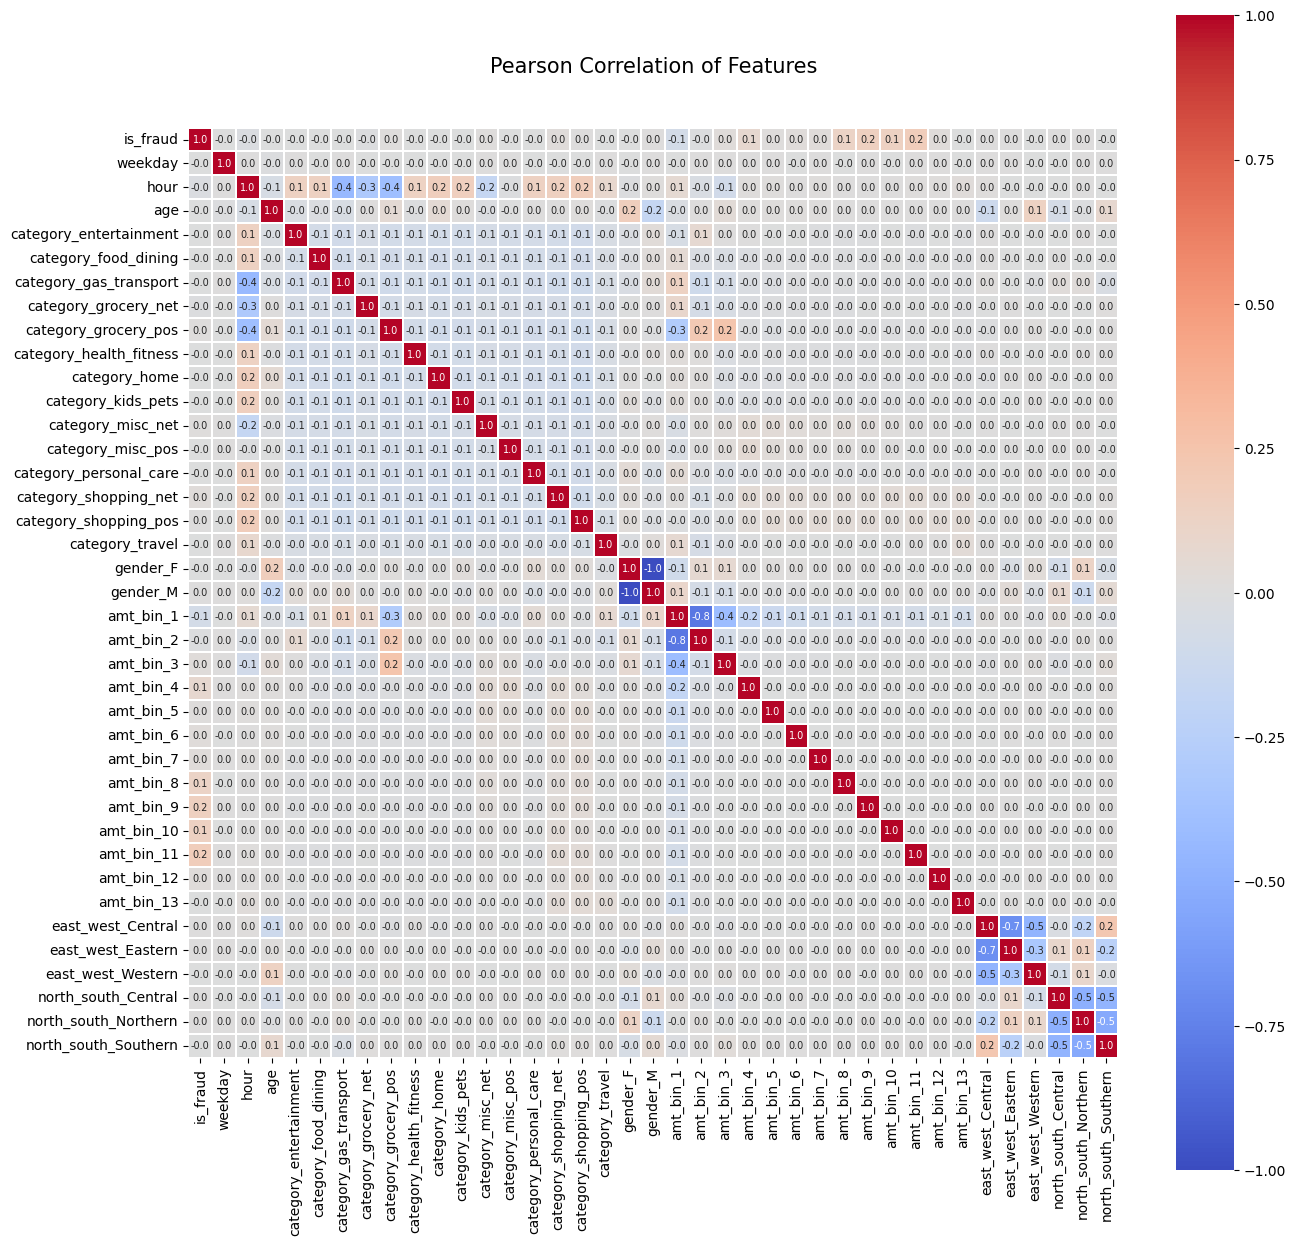

In [99]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(15, 15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(fraud_df2_encoded.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 7}, fmt='.1f')

## 13. Split datadet for training and test

In [100]:
fraud_df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   is_fraud                 491134 non-null  int64
 1   weekday                  491134 non-null  int32
 2   hour                     491134 non-null  int32
 3   age                      491134 non-null  int32
 4   category_entertainment   491134 non-null  bool 
 5   category_food_dining     491134 non-null  bool 
 6   category_gas_transport   491134 non-null  bool 
 7   category_grocery_net     491134 non-null  bool 
 8   category_grocery_pos     491134 non-null  bool 
 9   category_health_fitness  491134 non-null  bool 
 10  category_home            491134 non-null  bool 
 11  category_kids_pets       491134 non-null  bool 
 12  category_misc_net        491134 non-null  bool 
 13  category_misc_pos        491134 non-null  bool 
 14  category_personal_care   491134 non-

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

In [102]:
# Split data into train and test set
X_train_df = fraud_df2_encoded.drop('is_fraud', axis=1).values
target_label = fraud_df2_encoded['is_fraud'].values

In [103]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_train_df, target_label, test_size=0.3, random_state=2024)

## 14. Random Forest Classifier

In [113]:
# Train model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [114]:
# Predict test set
y_pred = model.predict(X_test)

In [129]:
# Calculate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print model performance
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

print('\nTrue Positives(TP) = ', conf_matrix[0,0])
print('\nTrue Negatives(TN) = ', conf_matrix[1,1])
print('\nFalse Positives(FP) = ', conf_matrix[0,1])
print('\nFalse Negatives(FN) = ', conf_matrix[1,0])
print('\n', classification_report(y_test, y_pred))

Accuracy: 0.9984050603701617
Precision: 0.8127853881278538
Recall: 0.478494623655914
F1 Score: 0.6023688663282573
Confusion Matrix:
 [[146928     41]
 [   194    178]]

True Positives(TP) =  146928

True Negatives(TN) =  178

False Positives(FP) =  41

False Negatives(FN) =  194

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    146969
           1       0.81      0.48      0.60       372

    accuracy                           1.00    147341
   macro avg       0.91      0.74      0.80    147341
weighted avg       1.00      1.00      1.00    147341



<Axes: >

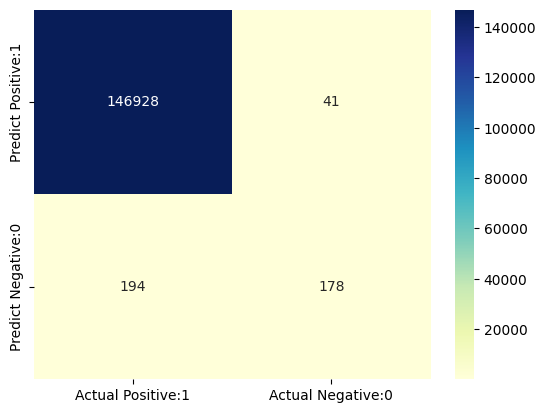

In [132]:
# visualize confusion matrix with seaborn heatmap
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

conf_matrix = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [133]:
from sklearn.model_selection import GridSearchCV

# Reset model
model = RandomForestClassifier(random_state=0)

# Define hyperparameter options
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Turning hyperparameter with GridSearchCV.
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

# Print the optimum hyperparameter.
print(CV_rfc.best_params_)

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 638, in _validate_params
    val

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## 15. Random Forest Classifier (weight adjustment)

In [107]:
class_weight = {0: 1, 1: 3}  
model = RandomForestClassifier(class_weight=class_weight, n_estimators=500, random_state=0)
model.fit(X_train, y_train)

# Predict test set
y_pred = model.predict(X_test)

# Calculate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print model performance
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9981607291928248
Precision: 0.7028112449799196
Recall: 0.47043010752688175
F1 Score: 0.5636070853462157
Confusion Matrix:
 [[146895     74]
 [   197    175]]


## 16. Gradient Boosting Classifier


In [110]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict test set
y_pred = model.predict(X_test)

# Calculate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print model performance
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9981335812842318
Precision: 0.7771428571428571
Recall: 0.3655913978494624
F1 Score: 0.4972577696526507
Confusion Matrix:
 [[146930     39]
 [   236    136]]


## 17. Retrospective

1. Better performance with extract features for hour, weekday, age, east_west, north_south

2. Binning for amount data is not good for model performance and need to read with graph data for fraud ratio

3. It is very effective to confirm the fraud ration by each feature  

4. Model performance is varied by the data type, and Less performance with categorize week day and hour data

5. The best performance with RandomForestClassifier is Precision 0.81, Recall 0.48, F1 Score 0.60

6. Need to consider more important features from the original dataset

